## Heart Disease UCI

Intro

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from time import time
sns.set_style("ticks")

In [4]:
# Read file
train=pd.read_csv("heart.csv")

In [7]:
train.tail()
#train.describe()
train.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB





# EDA



In [9]:
# Check for null values
train.isnull().sum().sum()

0

#### !. Age

Text(0.5, 1.0, 'Heart diseases by Age')

Text(0.5, 0, 'Age')

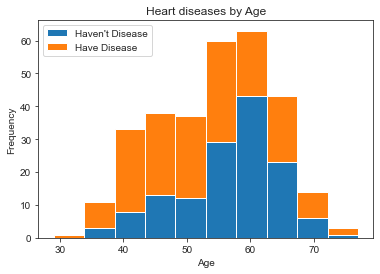

In [13]:
train.pivot(columns=['target'])['age'].\
    plot(kind='hist', stacked=True)
plt.title('Heart diseases by Age')
plt.xlabel('Age')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

### 2. Sex

Text(0.5, 1.0, 'Heart Disease Frequency for Sex')

Text(0.5, 0, 'Sex (0 = Female, 1 = Male)')

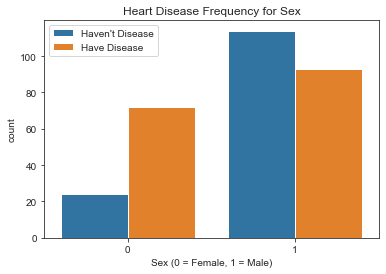

In [17]:
sns.countplot('sex',hue='target', data=train)
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
#plt.ylabel('Frequency')
plt.show()